# 奇偶数判断

Author: Jim Xie

Date:   2020-08-07

In [40]:
# -*- coding: utf-8 -*- 
import sys,os
import numpy as np
import random
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import math
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from numpy.random import RandomState
np.set_printoptions(suppress=True)
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,ExtraTreesClassifier, BaggingClassifier  
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from xgboost import XGBClassifier
sns.set(font_scale=2)
from warnings import filterwarnings
filterwarnings('ignore')

In [41]:
g_classifiers = [
    ('Logistic Regression', LogisticRegression()), 
    ('Nearest Neighbors', KNeighborsClassifier(3)),  
    ('Linear SVM', SVC(kernel='linear', C=0.025)),
    ('RBF SVM', SVC(gamma=2, C=1)),
    ('Gaussian Process', GaussianProcessClassifier(1.0 * RBF(1.0))),  
    ('Decision Tree', DecisionTreeClassifier(max_depth=5)),  
    ('Random Forest', RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)), 
    ('AdaBoost', AdaBoostClassifier()),  
    ('Extra Trees', ExtraTreesClassifier()),
    ('GradientBoosting', GradientBoostingClassifier()),  
    ('Bagging', BaggingClassifier()),
    ('Naive Bayes', GaussianNB()),  
    ('QDA', QuadraticDiscriminantAnalysis()),  
    ('LDA', LinearDiscriminantAnalysis()),  
    ('MLP', MLPClassifier(alpha=1)),
    ('XGB', XGBClassifier()),
]

In [42]:
def GetParityData():
    dataset_size = 100
    x1 = np.random.random_integers(1,500,dataset_size )
    y = []
    x = []
    for t1 in x1:
        if (t1)%2 == 0:
            y.append([1])
            x.append([t1])
        else:
            x.append([t1])
            y.append([0])
    return np.array(x),np.array(y)

# Learning from original data

In [43]:
raw_x,raw_y = GetParityData()
test_x,test_y = GetParityData()

Text(0, 0.5, 'X')

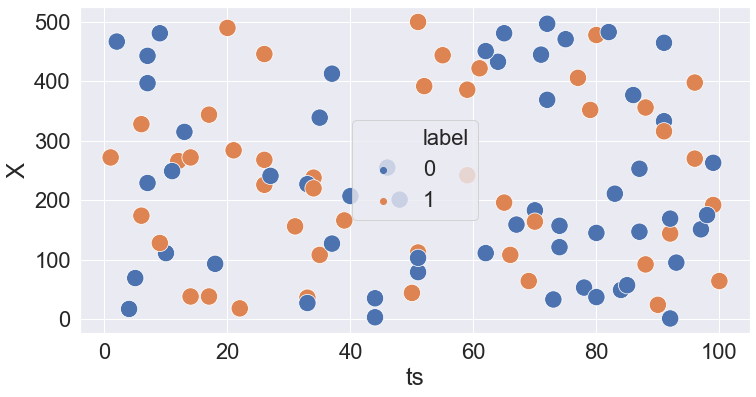

In [44]:
df = pd.DataFrame(raw_x)
df['label'] = raw_y
df['ts'] = np.random.random_integers(1,100,len(raw_y) )
plt.style.use({'figure.figsize':(12, 6)})
ax = sns.scatterplot(x="ts", y=0, data=df,hue='label',s=300)
ax.ticklabel_format(style='plain',axis='both')
plt.xlabel('ts',fontsize=24)
plt.ylabel('X',fontsize=24)

<AxesSubplot:xlabel='1', ylabel='0'>

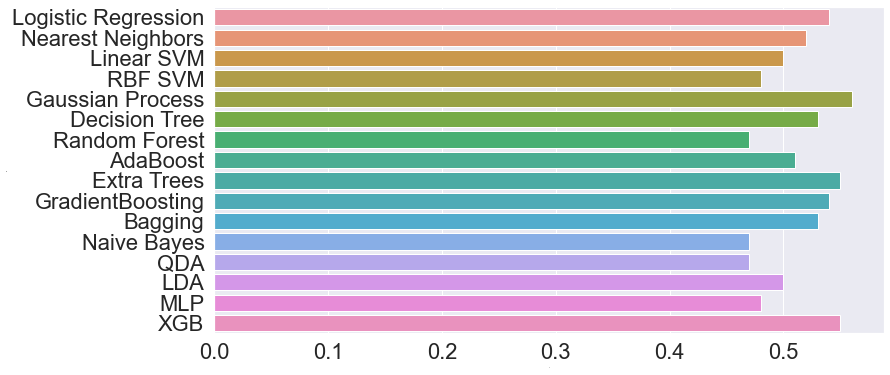

In [38]:
result = []
models = {}
for name, clf in g_classifiers:
    clf.fit(raw_x, raw_y)
    score = clf.score(test_x,test_y)
    result.append((name,score))
    models[name] = clf
df = pd.DataFrame(result)
plt.xlabel('Classifier',fontsize=2)
plt.ylabel('Accuracy',fontsize=2)
sns.barplot(y=0, x=1, data=df)

In [39]:
input_x = [[112],[244]]
input_x = np.random.random_integers(500,1000,20)
input_x=input_x[:,np.newaxis]
pred_x = np.array(input_x)
pred_y = models['LDA'].predict(pred_x)
for x,y in zip(input_x,pred_y):
    if y == 1:
        print(" %d --> Even" %x[0])
    else:
        print(" %d --> Odd" %x[0])

 537 --> Odd
 615 --> Odd
 526 --> Odd
 574 --> Odd
 865 --> Odd
 898 --> Odd
 820 --> Odd
 748 --> Odd
 980 --> Odd
 648 --> Odd
 518 --> Odd
 913 --> Odd
 738 --> Odd
 968 --> Odd
 891 --> Odd
 527 --> Odd
 953 --> Odd
 926 --> Odd
 971 --> Odd
 954 --> Odd


# Learning from good data distribution

In [9]:
def GetParityDataEx():
    dataset_size = 100
    x1 = np.random.random_integers(1,500,dataset_size )
    y = []
    x = []
    for t1 in x1:
        if (t1)%2 == 0:
            y.append([1])
            x.append([t1])
        else:
            x.append([-t1])
            y.append([-1])
    return np.array(x),np.array(y)

In [10]:
trans_raw_x,trans_raw_y = GetParityDataEx()
trans_test_x,trans_test_y = GetParityDataEx()

Text(0, 0.5, 'X')

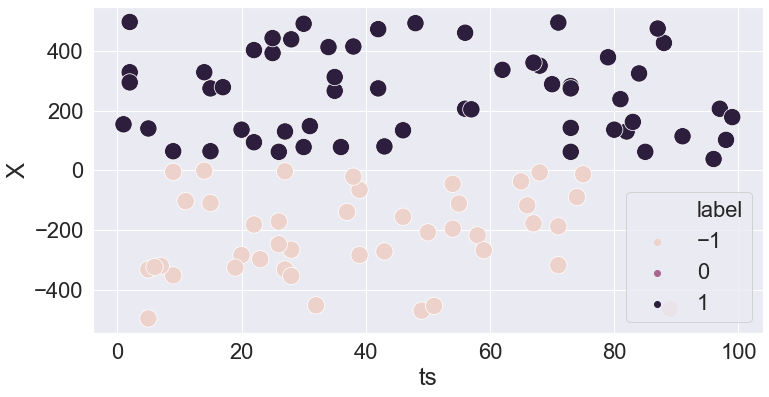

In [11]:
df = pd.DataFrame(trans_raw_x)
df['label'] = trans_raw_y
df['ts'] = np.random.random_integers(1,100,len(raw_y) )
plt.style.use({'figure.figsize':(12, 6)})
ax = sns.scatterplot(x='ts', y=0, data=df,hue='label',s=300)
ax.ticklabel_format(style='plain',axis='both')
plt.xlabel('ts',fontsize=24)
plt.ylabel('X',fontsize=24)

<AxesSubplot:xlabel='1', ylabel='0'>

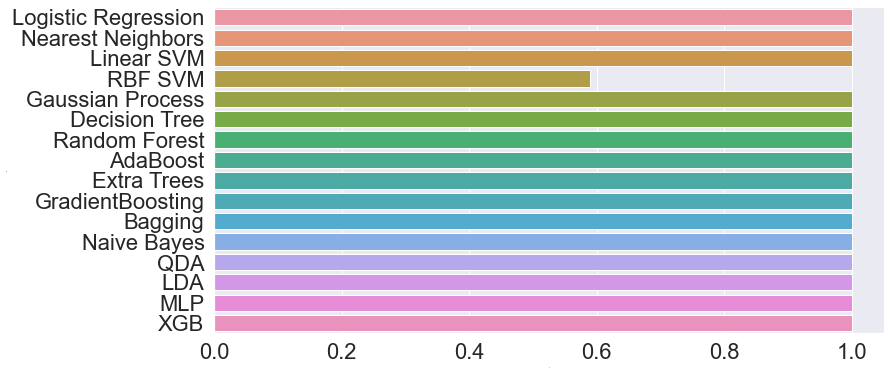

In [12]:
result = []
for name, clf in g_classifiers:
    clf.fit(trans_raw_x, trans_raw_y)
    score = clf.score(trans_test_x, trans_test_y)
    result.append((name,score))
df = pd.DataFrame(result)
plt.xlabel('Classifier',fontsize=2)
plt.ylabel('Accuracy',fontsize=2)
sns.barplot(y=0, x=1, data=df)